In [61]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [62]:
zoo_dir = "zoo.csv"
class_dir = "class.csv"

data_zoo = pd.read_csv(zoo_dir)
data_class = pd.read_csv(class_dir)

In [63]:
data = pd.merge(data_zoo, data_class, how='left', left_on='class_type', right_on='Class_Number') #左邊合併的資料用data_zoo,右邊的資料用class_type,以class_type合併
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


In [64]:
data.drop(['Class_Number', 'Number_Of_Animal_Species_In_Class', 'Animal_Names'], axis=1, inplace=True)
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Class_Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal


In [65]:
# Seperating all the categories of animals in a dictionary
animal_type = {}
animal_category = data.Class_Type.unique()
print("Seperating Categories...")
print(animal_category)
#建立animal dict
for category in animal_category:
    animal_type[category] = data[data['Class_Type']==category]
print("Seperation completed")
print(animal_type["Fish"]) #先以fish作check

Seperating Categories...
['Mammal' 'Fish' 'Bird' 'Invertebrate' 'Bug' 'Amphibian' 'Reptile']
Seperation completed
   animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
2         bass     0         0     1     0         0        1         1   
7         carp     0         0     1     0         0        1         0   
8      catfish     0         0     1     0         0        1         1   
12        chub     0         0     1     0         0        1         1   
18     dogfish     0         0     1     0         0        1         1   
34     haddock     0         0     1     0         0        1         0   
38     herring     0         0     1     0         0        1         1   
60        pike     0         0     1     0         0        1         1   
61     piranha     0         0     1     0         0        1         1   
73    seahorse     0         0     1     0         0        1         0   
82        sole     0         0     1     0         0        1

In [66]:
#Here we will split every category into trainig and test data
SPLIT = 0.9
train = pd.DataFrame() #to combine all the splited traning data from all categories
test = pd.DataFrame() #to combine all the splited test data from all categories
for category_name in animal_type:
    m = int(animal_type[category_name].shape[0] * SPLIT) #shape -> rowcount 
    train = pd.concat([train, animal_type[category_name].iloc[: m, :]])
    
    test = pd.concat([test, animal_type[category_name].iloc[m:, :]])
    
#Shuffling the train and test data randomly
train = train.sample(frac=1) #frac 抽樣的比數

test = test.sample(frac=1)
print(len(train)) #訓練集資料筆數
print(len(test)) #測試集訓練筆數
#確認資料是否平均切的正確
print(train["Class_Type"].unique())
print(test["Class_Type"].unique())

88
13
['Mammal' 'Bird' 'Fish' 'Bug' 'Reptile' 'Invertebrate' 'Amphibian']
['Mammal' 'Bird' 'Amphibian' 'Fish' 'Bug' 'Invertebrate' 'Reptile']


In [67]:
X_train = train.iloc[:,1:-2] # not using animal_name and class_type and Class_Type(category of animal)
y_train = train.iloc[:, -2] # class_type is the dependent feature
X_test = test.iloc[:, 1:-2]
y_test = test.iloc[:, -2]

In [68]:
y_train.head()

63    1
49    1
23    2
47    1
34    4
Name: class_type, dtype: int64

In [69]:
#特徵縮放
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [70]:

X_train_std


array([[ 1.1740436 , -0.50709255,  0.85175712, ...,  0.59484969,
        -0.4163332 ,  1.12089708],
       [ 1.1740436 , -0.50709255, -1.1740436 , ...,  0.59484969,
        -0.4163332 , -0.89214257],
       [-0.85175712,  1.97202659,  0.85175712, ...,  0.59484969,
        -0.4163332 ,  1.12089708],
       ...,
       [-0.85175712, -0.50709255,  0.85175712, ...,  0.59484969,
        -0.4163332 , -0.89214257],
       [ 1.1740436 , -0.50709255, -1.1740436 , ..., -1.68109695,
         2.40192231, -0.89214257],
       [ 1.1740436 , -0.50709255, -1.1740436 , ...,  0.59484969,
        -0.4163332 ,  1.12089708]])

In [71]:
from IPython.display import Math



In [72]:
Math(r'z=w^Tx')

<IPython.core.display.Math object>

In [73]:
Math(r'\phi{(z)}=\frac{1}{1+e^{-z}}')

<IPython.core.display.Math object>

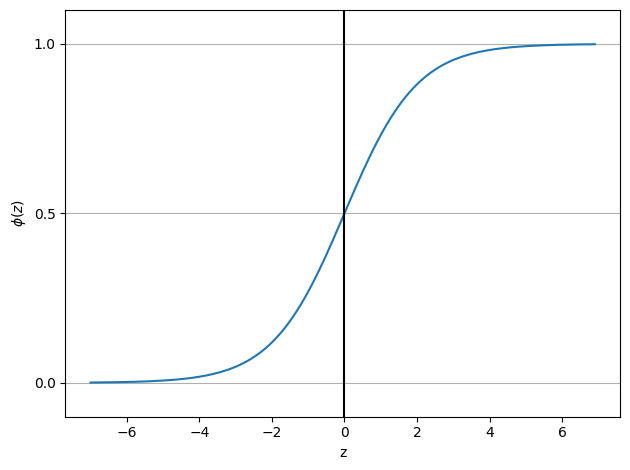

In [74]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('./figures/sigmoid.png', dpi=300)
plt.show()

In [75]:
y_train.values

array([1, 1, 2, 1, 4, 1, 6, 3, 1, 4, 6, 1, 1, 3, 4, 1, 1, 4, 1, 1, 7, 2,
       2, 1, 4, 1, 2, 1, 1, 5, 2, 1, 7, 4, 1, 2, 1, 1, 7, 6, 1, 2, 4, 6,
       1, 5, 7, 2, 1, 1, 1, 4, 7, 6, 7, 3, 1, 1, 6, 7, 5, 4, 2, 2, 1, 2,
       1, 1, 2, 2, 1, 7, 1, 7, 2, 1, 4, 1, 2, 4, 6, 2, 1, 2, 2, 3, 1, 1],
      dtype=int64)

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
lr = LogisticRegression()
lr.fit(X_train_std,y_train.values)

LogisticRegression()

In [78]:
y_pred = lr.predict(X_test_std)

In [79]:
y_test.values

array([1, 2, 5, 4, 1, 6, 1, 1, 1, 2, 7, 4, 3], dtype=int64)

In [80]:
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report



In [81]:
print(f"Accuracy = {metrics.accuracy_score(y_test, y_pred)}") #準確度
print()

print(metrics.classification_report(y_test, y_pred)) #模型結果表
#precision準確率、recall召回率、f1-score 召回率與準確率的平均、support 答對幾題

Accuracy = 1.0

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [ ]:
plt.scatter(y_test, y_pred, c=predict, cmap='tab10', s=100)
plt.scatter(dx_test.T[0], y_t, c=dy_test, cmap='Set3', s=35)

In [86]:
zoo = pd.read_csv("zoo2.csv")
test = zoo.iloc[:,1:-1]
ans = zoo.iloc[:,-1]


In [87]:
X_test_std = sc.transform(test)

In [88]:
y_pred = lr.predict(X_test_std)

In [89]:
print(f"Accuracy = {metrics.accuracy_score(ans, y_pred)}") #準確度
print()

print(metrics.classification_report(ans, y_pred)) #模型結果表
#precision準確率、recall召回率、f1-score 召回率與準確率的平均、support 答對幾題

Accuracy = 0.8837209302325582

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           3       1.00      0.67      0.80        12
           4       1.00      1.00      1.00         7
           5       0.67      1.00      0.80         6
           6       0.92      1.00      0.96        12
           7       1.00      0.83      0.91         6

    accuracy                           0.88        43
   macro avg       0.76      0.75      0.74        43
weighted avg       0.93      0.88      0.89        43



C:\Users\SCU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SCU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SCU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarni